# Solution for Titanic project from Kaggle.com

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
%matplotlib inline
sns.set_style('whitegrid')

In [155]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [156]:
def bar_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['survived','dead']
    df.plot(kind='bar',figsize=(10,5),title=feature,stacked=True)

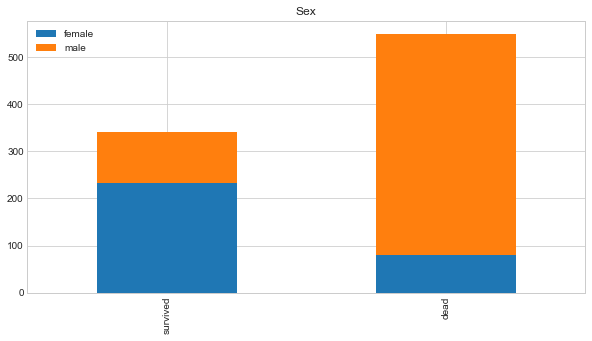

In [157]:
bar_chart('Sex')

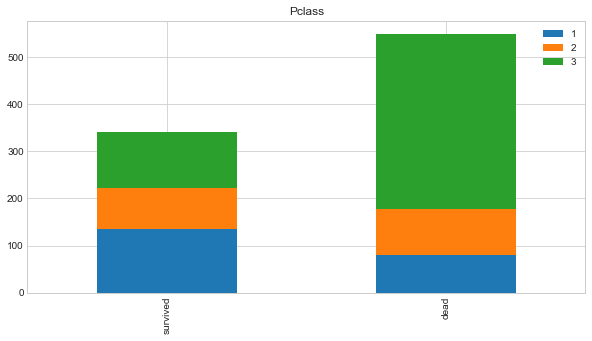

In [158]:
bar_chart('Pclass')

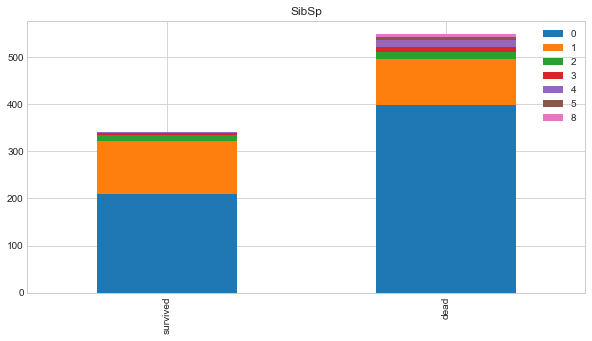

In [159]:
bar_chart('SibSp')

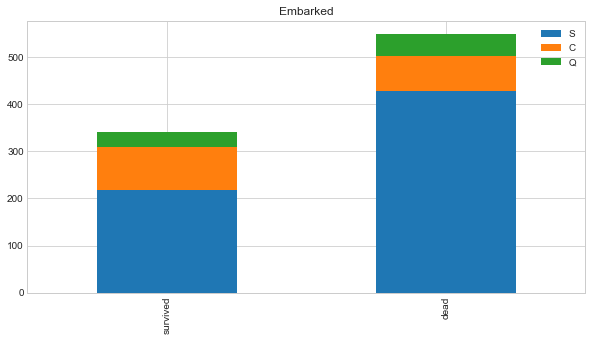

In [160]:
bar_chart('Embarked')

In [161]:
train_test_data=[train,test]
for dataset in train_test_data:
    dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [162]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [163]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Lady          1
Countess      1
Capt          1
Jonkheer      1
Don           1
Sir           1
Ms            1
Mme           1
Name: Title, dtype: int64

In [164]:
title_mapping={'Mr':0,'Miss':1,'Mrs':2,'Master':3 ,'Dr':3,'Rev':3,'Major':3,'Col':3,'Mlle':3,'Countess':3,'Mme':3,'Ms':3,'Jonkheer':3,'Sir':3,'Lady':3,'Don':3,'Capt':3}
for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map(title_mapping)

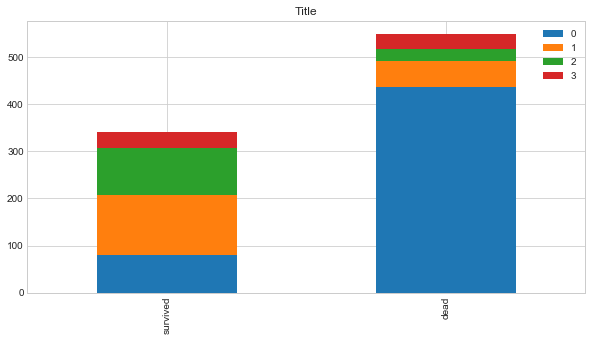

In [165]:
bar_chart('Title')

In [166]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [167]:
sex_mapping={'male':0,'female':1}
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)

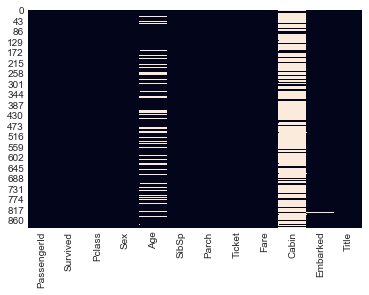

In [168]:
sns.heatmap(train.isnull(),cbar=False)

In [169]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [170]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)

In [171]:
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'),inplace=True)

In [172]:
for dataset in train_test_data:
    dataset.loc[dataset['Age']<=16,'Age']=0,
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26),'Age']=1,
    dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36),'Age']=2,
    dataset.loc[(dataset['Age']>36) & (dataset['Age']<=62),'Age']=3,
    dataset.loc[dataset['Age']>62,'Age']=4

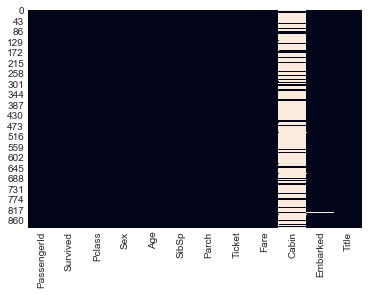

In [173]:
sns.heatmap(train.isnull(),cbar=False)

In [174]:
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')

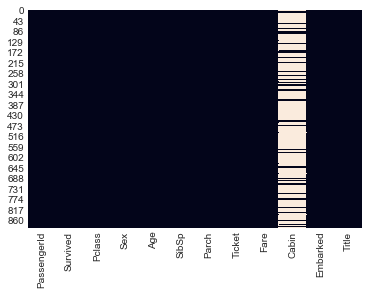

In [175]:
sns.heatmap(train.isnull(),cbar=False)

In [176]:
embarked_mapping={'S':0,'C':1,'Q':2}
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map(embarked_mapping)

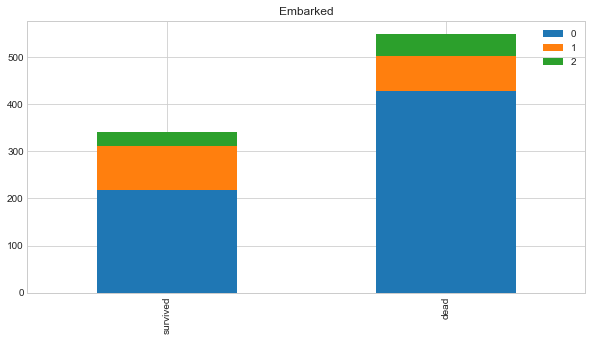

In [177]:
bar_chart('Embarked')

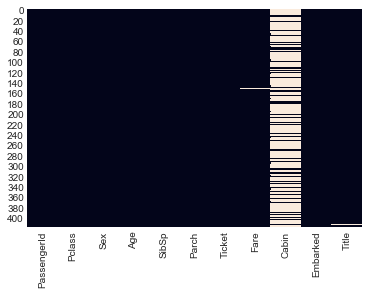

In [178]:
sns.heatmap(test.isnull(),cbar=False)

In [179]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'),inplace=True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'),inplace=True)

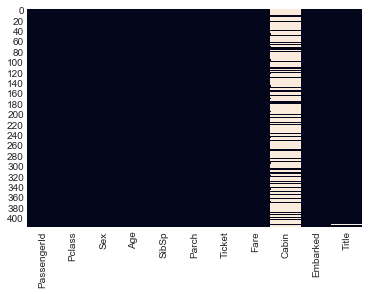

In [180]:
sns.heatmap(test.isnull(),cbar=False)

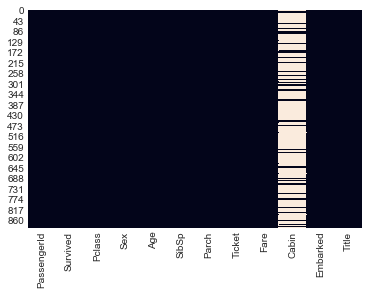

In [181]:
sns.heatmap(train.isnull(),cbar=False)

In [182]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=17,'Fare']=0,
    dataset.loc[(dataset['Fare']>17)&(dataset['Fare']<=30),'Fare']=1,
    dataset.loc[(dataset['Fare']>30)&(dataset['Fare']<=100),'Fare']=2,
    dataset.loc[dataset['Fare']>100,'Fare']=3

In [183]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [184]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,0.0,NaN,2,0.0
1,893,3,1,3.0,1,0,363272,0.0,NaN,0,2.0
2,894,2,0,3.0,0,0,240276,0.0,NaN,2,0.0
3,895,3,0,2.0,0,0,315154,0.0,NaN,0,0.0
4,896,3,1,1.0,1,1,3101298,0.0,NaN,0,2.0


In [185]:
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].str[:1]

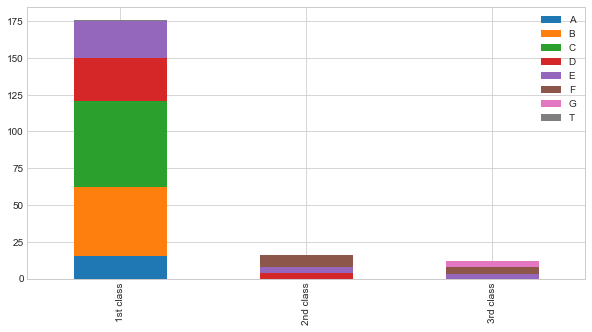

In [186]:
Pclass1=train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2=train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3=train[train['Pclass']==3]['Cabin'].value_counts()
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st class','2nd class','3rd class']
df.plot(kind='bar',stacked=True,figsize=(10,5))

In [187]:
cabin_mapping={'A':0,'B':0.4,"C":0.8,'D':1.2,'E':1.6,'F':2,'G':2.4,'T':2.8}
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)

In [188]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'),inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'),inplace=True)

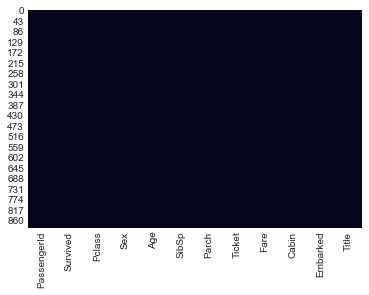

In [189]:
sns.heatmap(train.isnull(),cbar=False)

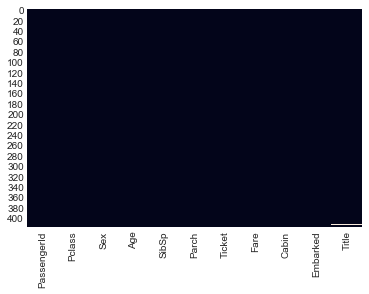

In [190]:
sns.heatmap(test.isnull(),cbar=False)

In [191]:
train['FamilySize']=train['SibSp']+train['Parch']+1
test['FamilySize']=test['SibSp']+test['Parch']+1

In [192]:
family_mapping={1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2,7:2.4,8:2.8,9:3.2,10:3.6,11:4}
for dataset in train_test_data:
    dataset['FamilySize']=dataset['FamilySize'].map(family_mapping)

In [193]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0,0,330911,0.0,2.0,2,0.0,0.0
1,893,3,1,3.0,1,0,363272,0.0,2.0,0,2.0,0.4
2,894,2,0,3.0,0,0,240276,0.0,2.0,2,0.0,0.0
3,895,3,0,2.0,0,0,315154,0.0,2.0,0,0.0,0.0
4,896,3,1,1.0,1,1,3101298,0.0,2.0,0,2.0,0.8


In [194]:
train['Title']=train['Title'].fillna(0)
test['Title']=test['Title'].fillna(0)

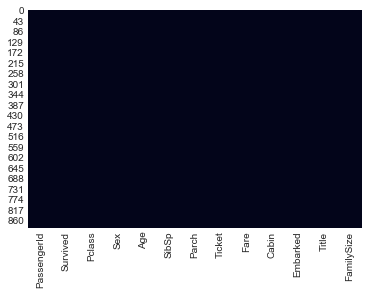

In [195]:
sns.heatmap(train.isnull(),cbar=False)

In [196]:
from sklearn.cross_validation import train_test_split

In [197]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [198]:
features_drop=['Ticket','SibSp','Parch']
train=train.drop(features_drop,axis=1)
test=test.drop(features_drop,axis=1)

In [199]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0.0,2.0,0,0,0.0


In [200]:
x=train.drop('Survived',axis=1)

In [201]:
x.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,3,0,1.0,0.0,2.0,0,0,0.4
1,2,1,1,3.0,2.0,0.8,1,2,0.4
2,3,3,1,1.0,0.0,2.0,0,1,0.0
3,4,1,1,2.0,2.0,0.8,0,2,0.4
4,5,3,0,2.0,0.0,2.0,0,0,0.0


In [202]:
y=train['Survived']

In [203]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [204]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [205]:
from sklearn.linear_model import LogisticRegression

In [206]:
model=LogisticRegression()

In [207]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [208]:
predictions=model.predict(x_test)

In [209]:
from sklearn.metrics import classification_report

In [210]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.79      0.90      0.84       154
          1       0.83      0.68      0.74       114

avg / total       0.81      0.80      0.80       268



In [215]:
final_predictions=model.predict(test)

In [222]:
test['Survived']=final_predictions

In [223]:
s=pd.read_csv('test.csv')

In [224]:
sub=pd.concat([s['PassengerId'],test['Survived']],axis=1)

In [227]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [228]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


In [226]:
sub.to_csv('Submission_last.csv',index=False)